In [1]:
import sys
import os

import pandas as pd

os.environ["USE_PYGEOS"] = "0"
import geopandas as gpd

sys.path.insert(0, "../src/helper")

from landprice_merger import (
    zensus_landprice_merger,
    landprice_neighborhood_merger,
    combine_landprice_with_geodata,
)
from csv_merger import combine_csvs
from principal_component_analysis import combine_PCA_datasets


In [2]:
cities = ["Berlin", "Bremen", "Dresden", "Frankfurt", "Köln"]

main_path = os.path.join(os.getcwd(), "..")

path_zensus = os.path.join(main_path, "res", "data", "DLR", "2 Zensus")
path_land = os.path.join(main_path, "res", "data", "DLR", "1 Land Prices")
path_neigh = os.path.join(main_path, "res", "data", "DLR", "3 Neighborhoods")


In [3]:
df_zensus = combine_csvs(str_path=path_zensus)

gdf_zensus = combine_PCA_datasets(
    df_zensus=df_zensus, str_city=cities[0], str_path=path_zensus
)


In [5]:
df_land_prices = combine_csvs(str_path=path_land)

gdf_landprices = combine_landprice_with_geodata(
    df_landprice=df_land_prices, str_city=cities[0], str_path=path_land
)

gdf_landprices_names = landprice_neighborhood_merger(
    gdf_landprice=gdf_landprices, str_city=cities[0], str_path_neigh=path_neigh
)


In [6]:
result = zensus_landprice_merger(
    gdf_landprices=gdf_landprices_names, gdf_zensus=gdf_zensus
)


In [12]:
result.head()


,Grid_Code,City_Code,geometry,families_total_units,famk_couple_children_more_18,famk_reg_partner_wout_child,famk_reg_partner_1_child_less_18,famk_reg_partner_children_more_18,famk_nonmarital_wout_child,famk_nonmarital_children_more_18,...,ForestryArea,GreenArea,IndustrialArea,MixedUseArea,OtherSpecialArea,Residential,SpecialUseArea,Village,Neighborhood_Name,District_Name
0,100mN32539E45693,11000000,"POLYGON ((4569300.000 3253900.000, 4569300.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,Schmöckwitz,Treptow-Köpenick
1,100mN32539E45694,11000000,"POLYGON ((4569400.000 3253900.000, 4569400.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,Schmöckwitz,Treptow-Köpenick
2,100mN32539E45695,11000000,"POLYGON ((4569500.000 3253900.000, 4569500.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,Schmöckwitz,Treptow-Köpenick
3,100mN32539E45696,11000000,"POLYGON ((4569600.000 3253900.000, 4569600.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,Schmöckwitz,Treptow-Köpenick
4,100mN32540E45692,11000000,"POLYGON ((4569200.000 3254000.000, 4569200.000...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,Schmöckwitz,Treptow-Köpenick


In [13]:
result.shape


(96838, 92)

<Axes: >

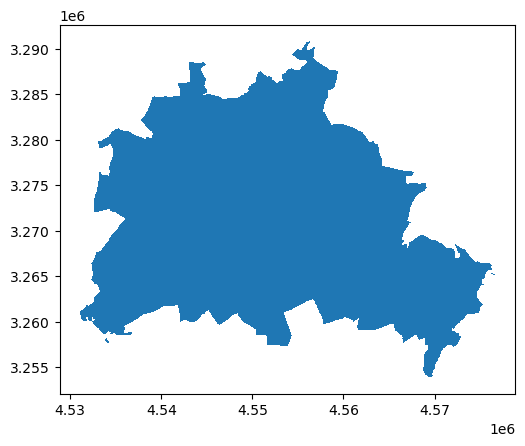

In [11]:
result.geometry.plot()
